In [1]:
from pathlib import Path
import sys

helper_utils = Path.cwd() / "utils"
sys.path.append(str(helper_utils))

from utils import helper_functions as hf
from utils import DATA_URLS
from PIL import Image
import pandas as pd 
import random
import torch

Invoking utils version 0.3.1
Faculty of Science and Engineering, University of Manchester


ImportError: cannot import name 'helper_functions' from 'utils' (c:\Users\Corona\Documents\Git\fse_dl_workshop\utils\__init__.py)

In [2]:
data_path = Path.cwd() / 'data'
dataset_path = hf.download_dataset(url=DATA_URLS['mango leaves'],
                                   dest_path=data_path,
                                   extract=True)
dataset_path = dataset_path / 'Root' / 'Original'

Extracting Root.zip: 100%|██████████| 13428/13428 [00:06<00:00, 1949.47it/s]


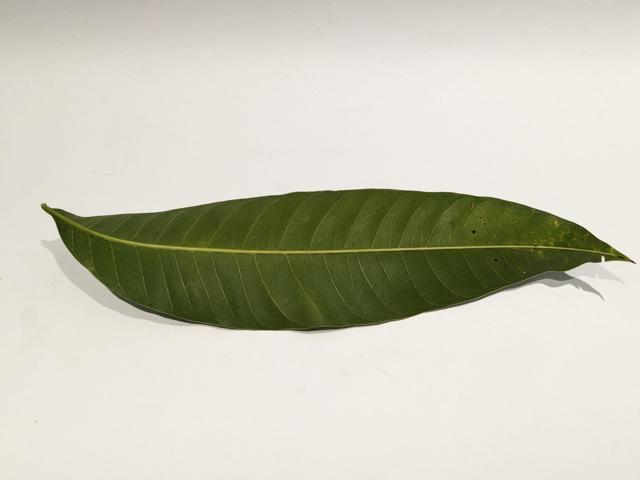

In [13]:
rnd_img = random.choice(ds.imgs)
img = Image.open(rnd_img[0])
img


In [ ]:
from torchvision import transforms

(224, 224)


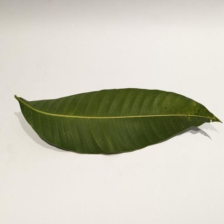

In [14]:
ts = transforms.Compose([
    transforms.Resize((224, 224)),
])
img = ts(img)
print(img.size)
img


(640, 480)


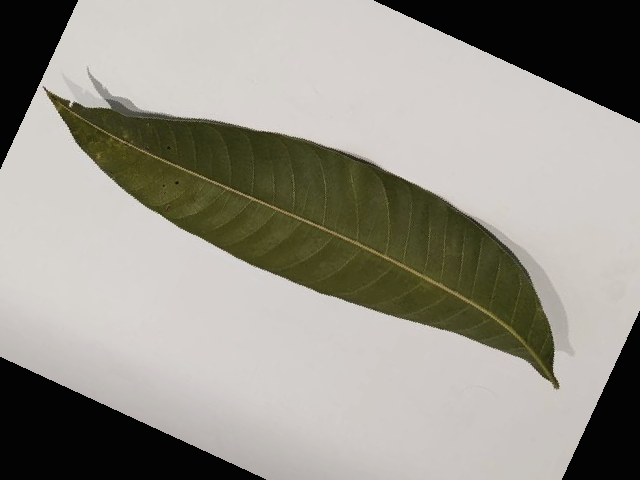

In [27]:
img = Image.open(rnd_img[0])
ts = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])
img = ts(img)
print(img.size)
img

In [9]:
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = torch.nn.Linear(16 * 112 * 112, 6)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 16 * 112 * 112)
        x = self.fc1(x)
        return x

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

ds = ImageFolder(dataset_path, transform=ts)
ds.classes

In [28]:
model = SimpleCNN()
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()
train_loader = DataLoader(ds, batch_size=32, shuffle=True)

for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print(f"Loss: {loss.item()}")
    

Loss: 1.7908328771591187
Loss: 173.93276977539062
Loss: 188.06271362304688
Loss: 126.10566711425781
Loss: 34.00777053833008
Loss: 2.377209186553955
Loss: 1.781341314315796
Loss: 1.7766047716140747
Loss: 1.7982805967330933
Loss: 1.7957656383514404
Loss: 1.7919752597808838
Loss: 1.792479157447815
Loss: 1.7910254001617432
Loss: 1.785080075263977
Loss: 1.7796978950500488
Loss: 1.7957849502563477
Loss: 1.7888877391815186
Loss: 1.8060659170150757
Loss: 1.792258620262146
Loss: 1.795597791671753
Loss: 1.7843070030212402
Loss: 1.7987701892852783
Loss: 1.7809727191925049
Loss: 1.792847990989685
Loss: 1.7907925844192505
Loss: 1.7858446836471558
Loss: 1.747171401977539


In [29]:
accuracy = 0
for images, labels in train_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    accuracy += (predicted == labels).sum().item()
accuracy = accuracy / len(ds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 19.95%


# Preparing data

In [35]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

ts_no_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

ds = ImageFolder(dataset_path, transform=ts_no_aug)
train_ds, val_ds = train_test_split(ds, test_size=0.2, random_state=42)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
        